  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

D:\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


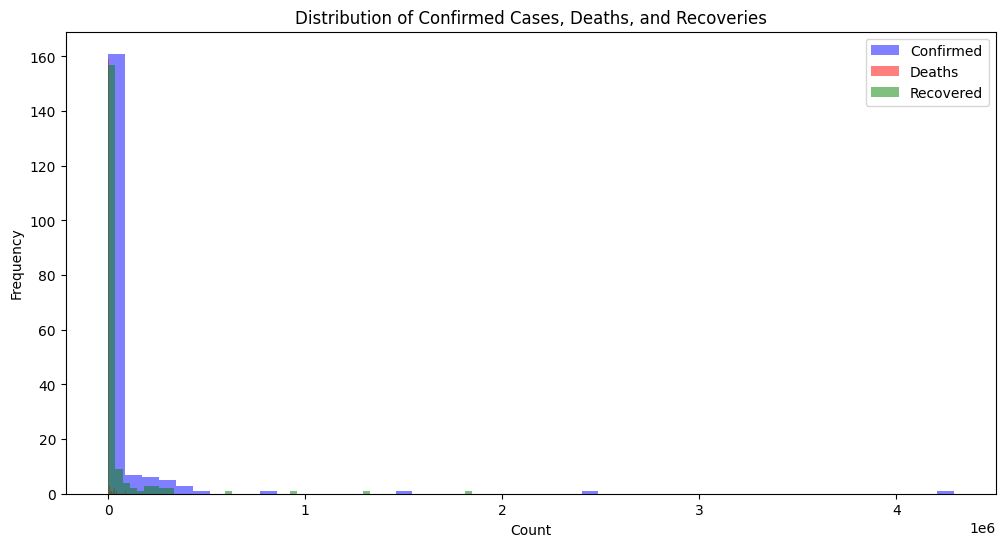

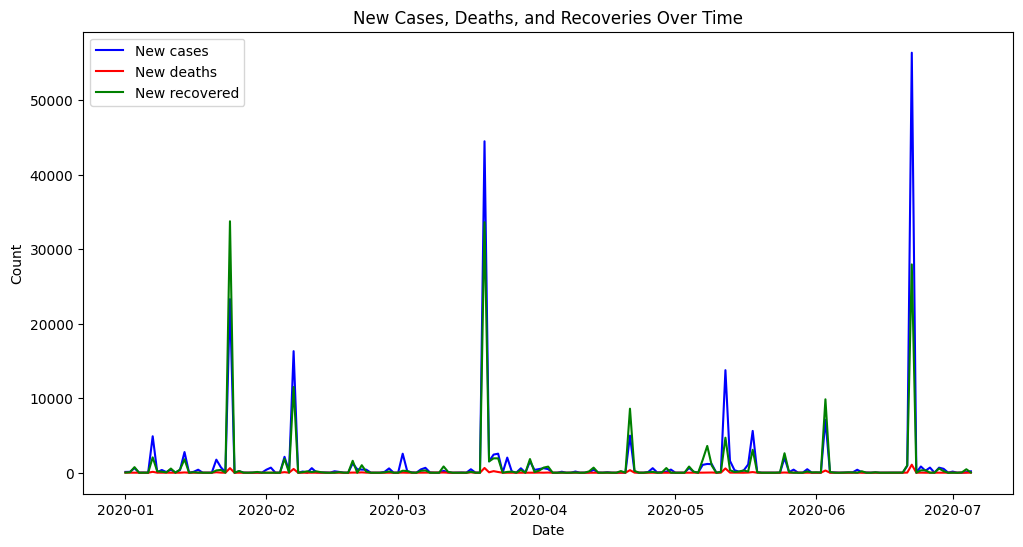

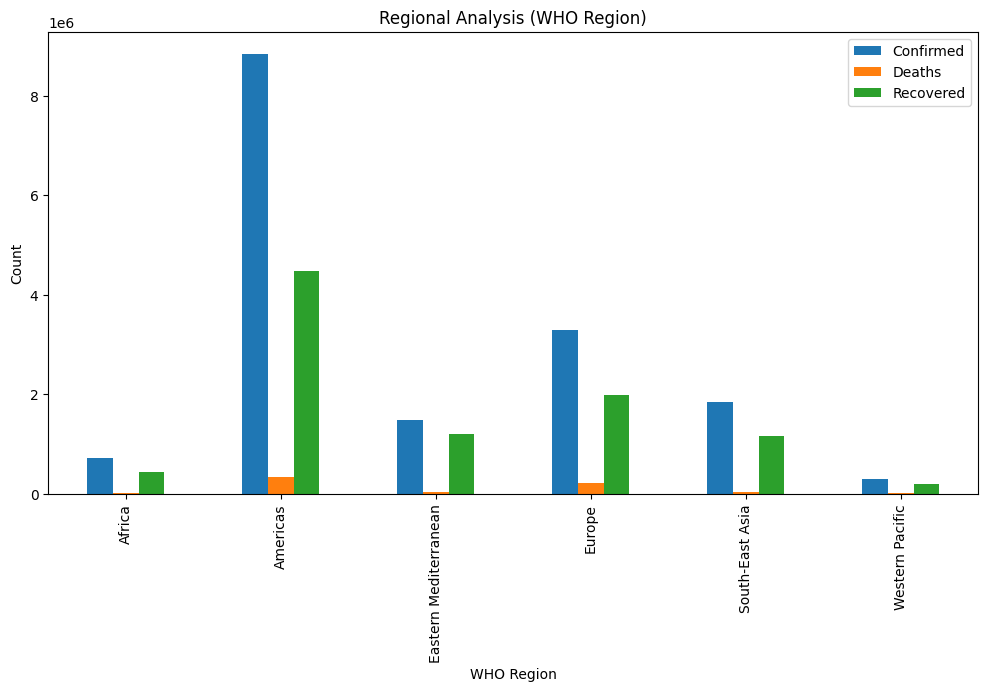

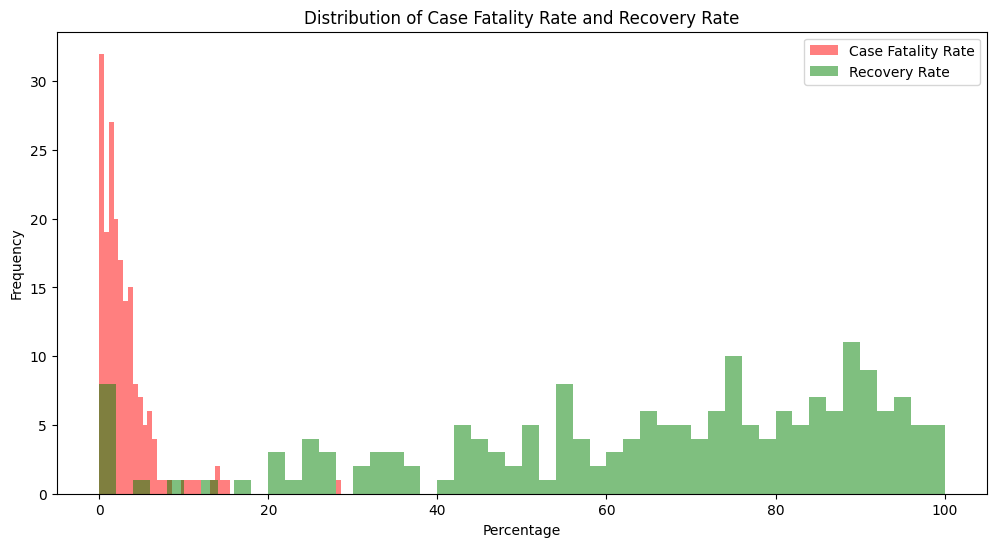

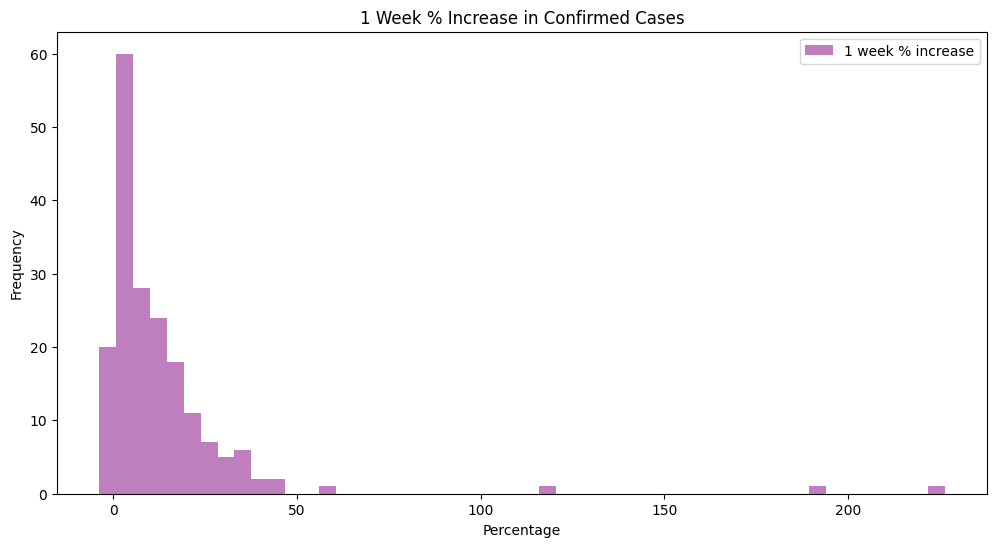

          Confirmed         Deaths     Recovered
count  6.000000e+00       6.000000  6.000000e+00
mean   2.746748e+06  109006.000000  1.578014e+06
std    3.160736e+06  137222.615334  1.550578e+06
min    2.924280e+05    8249.000000  2.067700e+05
25%    9.150912e+05   18752.000000  6.197170e+05
50%    1.663020e+06   39844.000000  1.179166e+06
75%    2.933466e+06  168695.250000  1.795642e+06
max    8.839286e+06  342732.000000  4.468616e+06


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'C:\Users\K HARISH\Downloads\country_wise_latest.csv')

# Inspect the dataset
print(df.head())
print(df.info())

# Data Cleaning and Preprocessing
# Convert relevant columns to numeric types
columns_to_convert = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 
                      'New deaths', 'New recovered', 'Deaths / 100 Cases', 
                      'Recovered / 100 Cases', 'Deaths / 100 Recovered', 
                      'Confirmed last week', '1 week change', '1 week % increase']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0
df.fillna(0, inplace=True)

# Summary Statistics
print(df.describe())

# Distribution of Confirmed Cases, Deaths, and Recoveries
plt.figure(figsize=(12, 6))
plt.hist(df['Confirmed'], bins=50, alpha=0.5, label='Confirmed', color='blue')
plt.hist(df['Deaths'], bins=50, alpha=0.5, label='Deaths', color='red')
plt.hist(df['Recovered'], bins=50, alpha=0.5, label='Recovered', color='green')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Confirmed Cases, Deaths, and Recoveries')
plt.legend()
plt.show()

# Assume you have a column 'Date' to plot over time, 
# ensure 'Date' column is of datetime type
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

# New Cases, Deaths, and Recoveries Over Time (Adjust this part if needed)
# If you don't have 'Date' column, you need to use a placeholder or create a date range
if 'Date' not in df.columns:
    df['Date'] = pd.date_range(start='2020-01-01', periods=len(df), freq='D')

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['New cases'], label='New cases', color='blue')
plt.plot(df['Date'], df['New deaths'], label='New deaths', color='red')
plt.plot(df['Date'], df['New recovered'], label='New recovered', color='green')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('New Cases, Deaths, and Recoveries Over Time')
plt.legend()
plt.show()

# Regional Analysis (WHO Region)
# Group by 'WHO Region' and sum only numeric columns
regions = df.groupby('WHO Region')[columns_to_convert].sum()
regions[['Confirmed', 'Deaths', 'Recovered']].plot(kind='bar', figsize=(12, 6))
plt.title('Regional Analysis (WHO Region)')
plt.ylabel('Count')
plt.show()

# Case Fatality Rate and Recovery Rate
df['Case Fatality Rate'] = df['Deaths'] / df['Confirmed'] * 100
df['Recovery Rate'] = df['Recovered'] / df['Confirmed'] * 100
plt.figure(figsize=(12, 6))
plt.hist(df['Case Fatality Rate'], bins=50, alpha=0.5, label='Case Fatality Rate', color='red')
plt.hist(df['Recovery Rate'], bins=50, alpha=0.5, label='Recovery Rate', color='green')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Case Fatality Rate and Recovery Rate')
plt.legend()
plt.show()

# Weekly Change Analysis
plt.figure(figsize=(12, 6))
plt.hist(df['1 week % increase'], bins=50, alpha=0.5, label='1 week % increase', color='purple')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('1 Week % Increase in Confirmed Cases')
plt.legend()
plt.show()

# Summary statistics for WHO regions
print(regions[['Confirmed', 'Deaths', 'Recovered']].describe())
